In [95]:
##<script>
##  jQuery(document).ready(function($) {  
##  
##  $(window).on('load', function(){
##    $('#preloader').fadeOut('slow',function(){$(this).remove();});
##  });
##  
##  });
##</script>
##
##<style type="text/css">
##  div#preloader { position: fixed; 
##      left: 0; 
##      top: 0; 
##      z-index: 999; 
##      width: 100%; 
##      height: 100%; 
##      overflow: visible; 
##      background: #fff url('http://preloaders.net/preloaders/720/Moving%20line.gif') no-repeat center center; 
##  }
##
##</style>
##
##<div id="preloader">
##
##</div>

# Pecprtual Framing Analysis Script (2019). Positive Evidence Bias test.

Considering Matan Mazor idea that Positive Evidence Bias (PEB) in confidence occurs product of differences in the perceptual noise, not in a cognitive processing of evidence supporting the chosen option. Since in the value experiment we found PEB on confidence, we check if there is a modulation on the PEB effect depending on the $\Delta$Val. Since for Matan PEB emerges from the a higher level of noise of for the chosen alternative, we may expect a stronger PEB when $\Delta$Val is higher (since it should have higher noise differences)

<a id='load'></a>
# 0. Load data and excluding participants

In [87]:
# Load data all participants
data_exp1 = pd.read_csv('/Users/pradyumna/Documents/GiTs/PF2019/Data/DataPerceptualFramingNotebook_v1.csv') 

for i in [31]:
    data_exp1 = data_exp1[(data_exp1.Part != i)]
print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 32 33]
Number of participants: 32


In [88]:
data_exp1=data_exp1.rename(index=str, columns={"ChosenITM":"Choice", 
                              "ChoiceRT":"RT",
                             "RValue":"RVal",
                             "LValue":"LVal",
                             "zRValue":"zRVal",
                             "zLValue":"zLVal",                    
                             "tDDT":"DDT",
                             "absDDT":"zAbsDDT",
                             "lIA_DT":"LDwellTime",
                             "rIA_DT":"RDwellTime",
                             "tGSF":"GSF",
                             "lastFixat":"LastFixat",
                             "DV":"DVal",
                             "zDV":"zDVal",
                             "absDV":"AbsDVal",
                             "zAbsDV":"zAbsDVal",                    
                             "zChoiceRT":"zRT",
                             "FamCh":"ChosenFam",
                              "FamUnCh":"UnchosenFam",
                              "ValCh":"ChosenVal",
                              "ValUnCh":"UnchosenVal",
                             "zFamCh":"zChosenFam",
                              "zFamUnCh":"zUnchosenFam",
                              "zValCh":"zChosenVal",
                              "zValUnCh":"zUnchosenVal",                   
                              "GSFMedSplit":"GSFSplit",
                            "DDTMedSplit":"DDTSplit"})
data_exp1.head()

,Unnamed: 0,Part,TrialN,PairID,LVal,RVal,Choice,RT,Conf,ConfRT,...,zDDT,zAbsDDT,zValR,zValL,ConfSplit,GSFSplit,DDTSplit,BaseCode,High,Low
0,0,1,1,49,110,131,0,4261.735,74,1584.966,...,-0.061319,0.061319,1.989851,1.170501,1,1,1,2,1.989851,1.170501
1,1,1,2,13,47,50,1,3559.258,54,1864.387,...,-0.056457,0.056457,-1.170501,-1.287551,0,1,1,0,-1.287551,-1.170501
2,2,1,3,16,50,44,1,3754.464,64,3778.807,...,0.497880,0.497880,-1.404601,-1.170501,0,0,1,0,-1.170501,-1.404601
3,3,1,4,7,57,50,0,2431.751,84,3064.179,...,-2.436702,2.436702,-1.170501,-0.897384,1,0,0,0,-0.897384,-1.170501
4,4,1,5,18,42,50,0,2199.342,44,2850.845,...,-0.817455,0.817455,-1.170501,-1.482634,0,0,0,0,-1.482634,-1.170501


In [89]:
data_exp1.columns

Index(['Unnamed: 0', 'Part', 'TrialN', 'PairID', 'LVal', 'RVal', 'Choice',
       'RT', 'Conf', 'ConfRT', 'BlockCond', 'DDT', 'LDwellTime', 'RDwellTime',
       'GSF', 'LastFixat', 'DVal', 'zDVal', 'AbsDVal', 'zAbsDVal', 'zConf',
       'zRT', 'TotVal', 'ChosenVal', 'UnchosenVal', 'Correct', 'zTotVal',
       'zChosenVal', 'zUnchosenVal', 'zGSF', 'zDDT', 'zAbsDDT', 'zValR',
       'zValL', 'ConfSplit', 'GSFSplit', 'DDTSplit', 'BaseCode', 'High',
       'Low'],
      dtype='object')

## Add missing zScored values

In [90]:
data_exp1["zGSF"] = z_score1(data_exp1,'Part',"GSF")
data_exp1["zDDT"] = z_score1(data_exp1,'Part',"DDT")
data_exp1["AbsDDT"] = abs(data_exp1["DDT"])
data_exp1["zAbsDDT"] = z_score1(data_exp1,'Part',"AbsDDT")

data_exp1["TotVal"] = data_exp1['LVal']+ data_exp1['RVal']
data_exp1["zTotVal"] = z_score1(data_exp1,'Part',"TotVal")

data_exp1["ChosenVal"] = data_exp1['RVal']*data_exp1['Choice']+ data_exp1['LVal']*(1-data_exp1['Choice'])
data_exp1["UnchosenVal"] = data_exp1['LVal']*data_exp1['Choice']+ data_exp1['RVal']*(1-data_exp1['Choice'])
data_exp1["zChosenVal"] = z_score1(data_exp1,'Part',"ChosenVal")
data_exp1["zUnchosenVal"] = z_score1(data_exp1,'Part',"UnchosenVal")


## Change the name of the BlockCond

In [91]:
# Change so everything is equal
data_exp1 = data_exp1.replace('NEXTLESS', 'MORE')
data_exp1 = data_exp1.replace('NEXTMORE', 'LESS')
data_exp1['BlockCond'].unique()

# Change so everything is equal
data_exp1 = data_exp1.replace('MORE', 1)
data_exp1 = data_exp1.replace('LESS', 2)
data_exp1['BlockCond'].unique()

array([2, 1])

## Add correct variable

In [92]:
Correct = []
for i in range(len(data_exp1)):
    if data_exp1.BlockCond[i] == 1:
        if (data_exp1.Choice[i] == 1 and (data_exp1.LVal[i] < data_exp1.RVal[i])) or (data_exp1.Choice[i] == 0 and (data_exp1.LVal[i] > data_exp1.RVal[i])):
            Correct.append(1)
        else:
            Correct.append(0)
    if data_exp1.BlockCond[i] == 2:
        if (data_exp1.Choice[i] == 1 and (data_exp1.LVal[i] > data_exp1.RVal[i])) or (data_exp1.Choice[i] == 0 and (data_exp1.LVal[i] < data_exp1.RVal[i])):
            Correct.append(1)
        else:
            Correct.append(0)

data_exp1["Correct"] = Correct

## Add % time looked at each item

In [93]:
data_exp1['LGazePC'] = (data_exp1['LDwellTime']) / (data_exp1['RDwellTime'] + data_exp1['LDwellTime'])
data_exp1['RGazePC'] = (data_exp1['RDwellTime']) / (data_exp1['RDwellTime'] + data_exp1['LDwellTime'])

data_exp1['HValGazePC'] = ( data_exp1['LVal'] >= data_exp1['RVal'] ) * data_exp1['LGazePC'] + ( data_exp1['LVal'] <= data_exp1['RVal'] ) * data_exp1['RGazePC']
data_exp1['LValGazePC'] = ( data_exp1['LVal'] <= data_exp1['RVal'] ) * data_exp1['LGazePC'] + ( data_exp1['LVal'] >= data_exp1['RVal'] ) * data_exp1['RGazePC']

data_exp1['zLGazePC'] = z_score1(data_exp1,'Part','LGazePC')
data_exp1['zRGazePC'] = z_score1(data_exp1,'Part','RGazePC')

data_exp1['zHValGazePC'] = z_score1(data_exp1,'Part','HValGazePC')
data_exp1['zLValGazePC'] = z_score1(data_exp1,'Part','LValGazePC')  

## add % time looked at chosen items

In [94]:
data_exp1['ChosenGazePC'] = ( data_exp1['Choice'] == 0) * data_exp1['LGazePC'] + ( data_exp1['Choice'] == 1) * data_exp1['LGazePC']
data_exp1['UnchosenGazePC'] = ( data_exp1['Choice'] == 1) * data_exp1['LGazePC'] + ( data_exp1['Choice'] == 0)  * data_exp1['RGazePC']

data_exp1['zChosenGazePC'] = z_score1(data_exp1,'Part','ChosenGazePC')
data_exp1['zUnchosenGazePC'] = z_score1(data_exp1,'Part','UnchosenGazePC')  

# Add  % time looked at each item

In [95]:
data_exp1['LGazePC'] = (data_exp1['LDwellTime']) / (data_exp1['RDwellTime'] + data_exp1['LDwellTime'])
data_exp1['RGazePC'] = (data_exp1['RDwellTime']) / (data_exp1['RDwellTime'] + data_exp1['LDwellTime'])

data_exp1['HValGazePC'] = ( data_exp1['LVal'] >= data_exp1['RVal'] ) * data_exp1['LGazePC'] + ( data_exp1['LVal'] <= data_exp1['RVal'] ) * data_exp1['RGazePC']
data_exp1['LValGazePC'] = ( data_exp1['LVal'] <= data_exp1['RVal'] ) * data_exp1['LGazePC'] + ( data_exp1['LVal'] >= data_exp1['RVal'] ) * data_exp1['RGazePC']

data_exp1['zLGazePC'] = z_score1(data_exp1,'Part','LGazePC')
data_exp1['zRGazePC'] = z_score1(data_exp1,'Part','RGazePC')

data_exp1['zHValGazePC'] = z_score1(data_exp1,'Part','HValGazePC')
data_exp1['zLValGazePC'] = z_score1(data_exp1,'Part','LValGazePC')  

## Add % time looked at chosen items

In [96]:
data_exp1['ChosenGazePC'] = ( data_exp1['Choice'] == 0) * data_exp1['LGazePC'] + ( data_exp1['Choice'] == 1) * data_exp1['LGazePC']
data_exp1['UnchosenGazePC'] = ( data_exp1['Choice'] == 1) * data_exp1['LGazePC'] + ( data_exp1['Choice'] == 0)  * data_exp1['RGazePC']

data_exp1['zChosenGazePC'] = z_score1(data_exp1,'Part','ChosenGazePC')
data_exp1['zUnchosenGazePC'] = z_score1(data_exp1,'Part','UnchosenGazePC')  

## Add variable for the difference between chosen - unchosen

In [97]:
data_exp1['AbsDVal_ChoUncho'] = np.abs(data_exp1['ChosenVal'] - data_exp1['UnchosenVal'] )
#data_exp1['zAbsDVal_ChoUncho'] = z_score1(data_exp1,'Part','AbsDVal_ChoUncho')

## Add Split for $\Delta$Val

In [98]:
Splits_headers = ['AbsDVal_ChoUncho']
Splits_variables = ['AbsDVal_ChoUncho']
data_exp1['zAbsDVal_ChoUncho'] = z_score1(data_exp1,'Part','AbsDVal_ChoUncho')
data_exp1['AbsDVal_ChoUncho_Split'] = splitByVar(data_exp1, Splits_variables,Splits_headers)

## Add Split for $\Sigma$Val

In [99]:
Splits_headers = ['zTotVal']
Splits_variables = ['zTotVal']
data_exp1['AbszTotVal_Split'] = splitByVar(data_exp1, Splits_variables,Splits_headers)

# Data Analysis 
-------------------------------------------

### List of parameters available for analysis

In [100]:
#Transform to numeric values in the dataframe
data_exp1 = data_exp1.apply(pd.to_numeric, errors='ignore')

<a id='reg'></a>
# 3. Regression Analysis
 

## Loading data in R

In [101]:
%R -i data_exp1


In [102]:
%%R
library(lme4)
#library(car)
library(optimx)
library(ggplot2)
library(MASS)
library(broom)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

In [103]:
%R
##Change Column name for better regression presentation
#colnames(data_exp1)[which(names(data_exp1) == "zChoiceRT")] <- "zRT"
#colnames(data_exp1)[which(names(data_exp1) == "ChoiceRT")] <- "RT"

In [104]:
%%R
# Separating the data for both conditions 
data_exp1_Like <- data_exp1[ which(data_exp1$BlockCond=='1'), ]
data_exp1_DisLike <- data_exp1[ which(data_exp1$BlockCond=='2'), ]

<a id='regCond'></a>
# 3.1.  Regressions per Condition (Most/Few)


### Confidence regression (no separation)

First of all let's plot the regression we have in the paper, plus the influence of ChosenValue

[1] "Like BIC:"
[1] 10001.3
[1] "DisLike BIC:"
[1] 10654.46


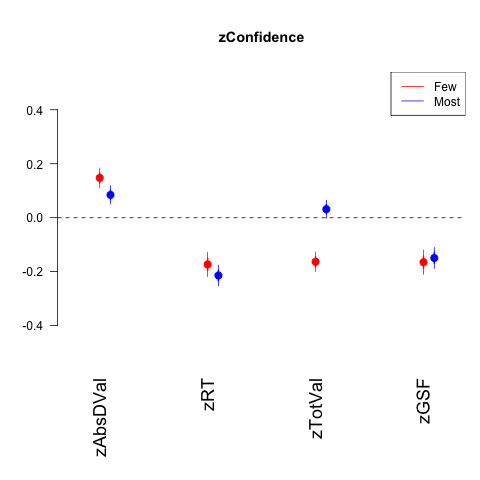

In [105]:
%%R
#title
title_plot = ("zConfidence")

ModelConfidenceL_2 <- glm(zConf ~ zAbsDVal + zRT + zTotVal + zGSF  , data=data_exp1_Like)
ModelConfidenceD_2 <- glm(zConf ~ zAbsDVal+ + zRT + zTotVal + zGSF , data=data_exp1_DisLike)

BIC1 = BIC(ModelConfidenceL_2)
BIC2 = BIC(ModelConfidenceD_2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceD_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5,ylim=c(-0.5, 0.5), cex.pts=2, mar = c(8,4,5,1) ,main=title_plot)
coefplot(ModelConfidenceL_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 10391.54
[1] "DisLike BIC:"
[1] 10896.93
[1] "Most frame coefficients"
               Estimate Std. Error    t value     Pr(>|t|)
(Intercept)  -0.0188739 0.01817181  -1.038637 2.990392e-01
zChosenVal    0.6126288 0.04369507  14.020547 1.365850e-43
zUnchosenVal -0.6007465 0.04774969 -12.581159 1.339769e-35
[1] "Fewest frame coefficients"
               Estimate Std. Error   t value     Pr(>|t|)
(Intercept)  -0.2728503 0.01930372 -14.13460 2.944704e-44
zChosenVal   -0.7719492 0.05013997 -15.39588 6.051216e-52
zUnchosenVal  0.5961799 0.04588167  12.99386 8.232377e-38


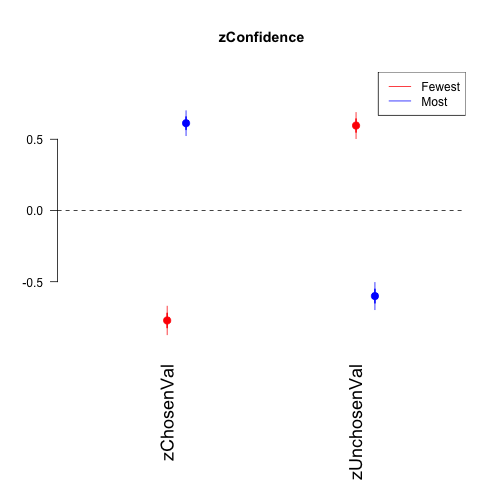

In [106]:
%%R
#title
title_plot = ("zConfidence")

ModelConfidenceL_2 <- glm(zConf ~  zChosenVal + zUnchosenVal , data=data_exp1_Like)
ModelConfidenceD_2 <- glm(zConf ~  zChosenVal + zUnchosenVal , data=data_exp1_DisLike)

BIC1 = BIC(ModelConfidenceL_2)
BIC2 = BIC(ModelConfidenceD_2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceD_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-.9, .9) ,main=title_plot)
coefplot(ModelConfidenceL_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Fewest", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

print ('Most frame coefficients')
print(summary(ModelConfidenceL_2)$coefficients)
print ('Fewest frame coefficients')
print(summary(ModelConfidenceD_2)$coefficients)


ValCh: Value Chosen Item 

ValUnCh: Value Unchosen Item

[1] "Like BIC:"
[1] 10413.41
[1] "DisLike BIC:"
[1] 10911.56


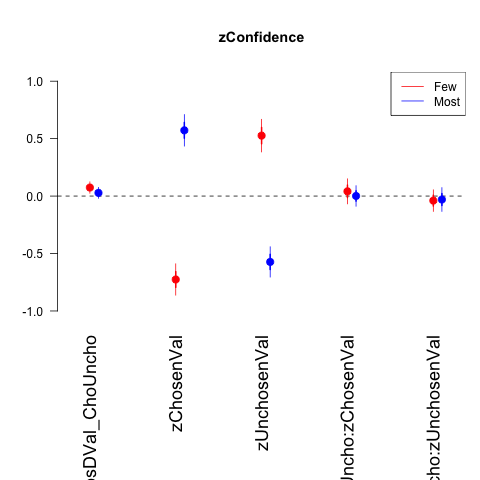

In [107]:
%%R
#title
title_plot = ("zConfidence")

ModelConfidenceL_2 <- glm(zConf ~ zAbsDVal_ChoUncho+ zChosenVal + zUnchosenVal + zChosenVal:zAbsDVal_ChoUncho + zUnchosenVal:zAbsDVal_ChoUncho , data=data_exp1_Like)
ModelConfidenceD_2 <- glm(zConf ~ zAbsDVal_ChoUncho+ zChosenVal + zUnchosenVal  + zChosenVal:zAbsDVal_ChoUncho + zUnchosenVal:zAbsDVal_ChoUncho, data=data_exp1_DisLike)

BIC1 = BIC(ModelConfidenceL_2)
BIC2 = BIC(ModelConfidenceD_2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceD_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, ylim=c(-1,1), mar = c(8,4,5,1) ,main=title_plot)
coefplot(ModelConfidenceL_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 10414.22
[1] "DisLike BIC:"
[1] 10917.83


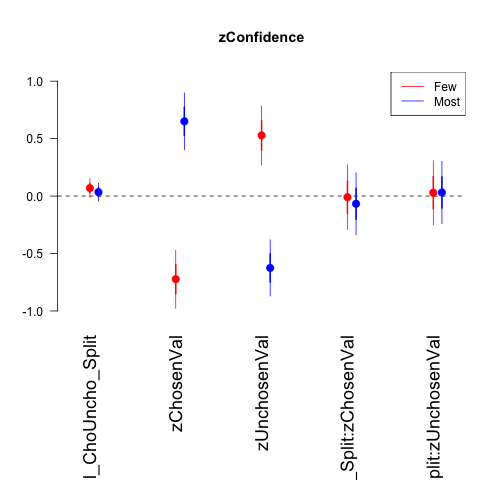

In [108]:
%%R
#title
title_plot = ("zConfidence")

ModelConfidenceL_2 <- glm(zConf ~ AbsDVal_ChoUncho_Split+ zChosenVal + zUnchosenVal + zChosenVal:AbsDVal_ChoUncho_Split+ zUnchosenVal:AbsDVal_ChoUncho_Split, data=data_exp1_Like) 

ModelConfidenceD_2 <- glm(zConf ~ AbsDVal_ChoUncho_Split + zChosenVal + zUnchosenVal  +zChosenVal:AbsDVal_ChoUncho_Split + zUnchosenVal:AbsDVal_ChoUncho_Split, data=data_exp1_DisLike)
BIC1 = BIC(ModelConfidenceL_2)
BIC2 = BIC(ModelConfidenceD_2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceD_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2,ylim=c(-1, 1), mar = c(8,4,5,1) ,main=title_plot)
coefplot(ModelConfidenceL_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

Interaction between DVal_ChoUnchosen Split variable  and the influence of the unchosen item. In like, the higher is the DVAL, i.e., the higher is the relative value of the chosen item the more difference in noise level we should observe, and then a lower effect of Unchosen Value over confidence. In like we observe a trend for this effect. On the other hand in dislike there is a flip, that means the more difference between chosen and unchosen, more effect of the unchosen on confidence. This makes sense because, bigger difference would mean the chosen value is lower (dislike frame), comparatively less noise, therefore unchosen is comparatively higher. Actually, I don't understand fully what's happening in dislike.

## Using the DVAl_ChosenUnchosen Split to separate

## MOST frame

In [109]:
%%R
# Separating the data for both conditions 
data_exp1_Like_Low <- data_exp1[ which(data_exp1$BlockCond=='1' & data_exp1$AbsDVal_ChoUncho_Split=='0'), ]
data_exp1_Like_High <- data_exp1[ which(data_exp1$BlockCond=='1' & data_exp1$AbsDVal_ChoUncho_Split=='1'), ]


[1] "Like High BIC:"
[1] 5154.34
[1] "Like Low BIC:"
[1] 5261.102


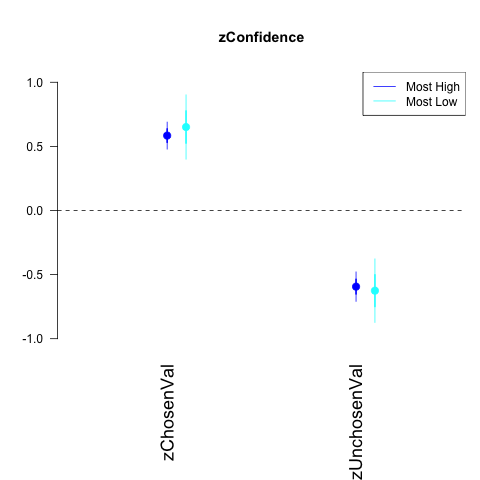

In [110]:
%%R
#title
title_plot = ("zConfidence")

ModelConfidenceD_2 <- glm(zConf ~  zChosenVal + zUnchosenVal + zChosenVal+ zUnchosenVal, data=data_exp1_Like_Low) 

ModelConfidenceL_2 <- glm(zConf ~  zChosenVal + zUnchosenVal  +zChosenVal + zUnchosenVal, data=data_exp1_Like_High)
BIC1 = BIC(ModelConfidenceL_2)
BIC2 = BIC(ModelConfidenceD_2)
print("Like High BIC:")
print(BIC1)
print("Like Low BIC:")
print(BIC2)

coefplot(ModelConfidenceL_2,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2,ylim=c(-1, 1), mar = c(8,4,5,1) ,main=title_plot)
coefplot(ModelConfidenceD_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="cyan", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Most High", "Most Low"),col=c("blue", "cyan"), lty=1:1, cex=1)

## FEWEST frame

In [111]:
%%R
# Separating the data for both conditions 
data_exp1_Dislike_Low <- data_exp1[ which(data_exp1$BlockCond=='2' & data_exp1$AbsDVal_ChoUncho_Split=='0'), ]
data_exp1_Dislike_High <- data_exp1[ which(data_exp1$BlockCond=='2' & data_exp1$AbsDVal_ChoUncho_Split=='1'), ]


[1] "Like High BIC:"
[1] 5432.957
[1] "Like Low BIC:"
[1] 5487.194


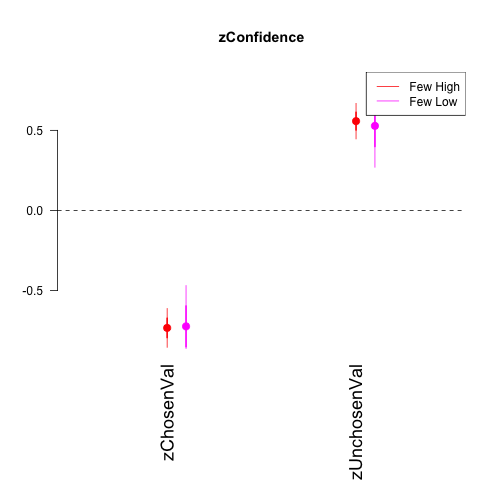

In [112]:
%%R
#title
title_plot = ("zConfidence")

ModelConfidenceD_2 <- glm(zConf ~  zChosenVal + zUnchosenVal , data=data_exp1_Dislike_Low) 

ModelConfidenceL_2 <- glm(zConf ~ zChosenVal + zUnchosenVal  , data=data_exp1_Dislike_High)
BIC1 = BIC(ModelConfidenceL_2)
BIC2 = BIC(ModelConfidenceD_2)
print("Like High BIC:")
print(BIC1)
print("Like Low BIC:")
print(BIC2)

coefplot(ModelConfidenceL_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2,ylim=c(-0.8, 0.8), mar = c(8,4,5,1) ,main=title_plot)
coefplot(ModelConfidenceD_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="magenta", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few High", "Few Low"),col=c("red", "magenta"), lty=1:1, cex=1)

## If we characterise PEB (positive evidence bias) as not necessarily refering only to the winning option, more to the influence of $\Sigma$Val

[1] "Like BIC:"
[1] 10512.35
[1] "DisLike BIC:"
[1] 11007.12


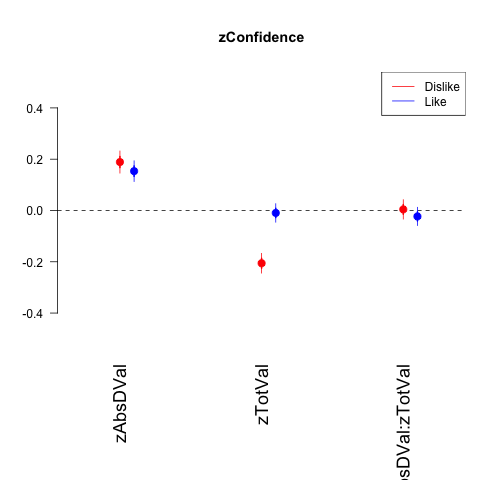

In [113]:
%%R
#title
title_plot = ("zConfidence")

ModelConfidenceL_2 <- glm(zConf ~  zAbsDVal + zTotVal +  zAbsDVal:zTotVal , data=data_exp1_Like)
ModelConfidenceD_2 <- glm(zConf ~  zAbsDVal + zTotVal + zAbsDVal:zTotVal , data=data_exp1_DisLike)

BIC1 = BIC(ModelConfidenceL_2)
BIC2 = BIC(ModelConfidenceD_2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceD_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, ylim=c(-0.5, 0.5), mar = c(8,4,5,1) ,main=title_plot)
coefplot(ModelConfidenceL_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like High BIC:"
[1] 4996.959
[1] "Like Low BIC:"
[1] 5037.863


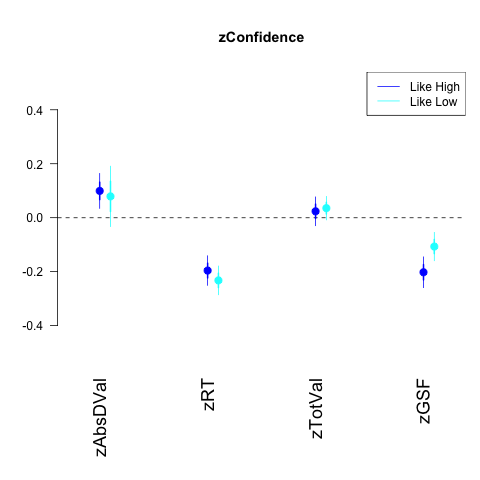

In [114]:
%%R
#title
title_plot = ("zConfidence")

ModelConfidenceD_2 <- glm(zConf ~  zAbsDVal + zRT + zTotVal + zGSF   , data=data_exp1_Like_Low) 

ModelConfidenceL_2 <- glm(zConf ~ zAbsDVal + zRT + zTotVal + zGSF  , data=data_exp1_Like_High)
BIC1 = BIC(ModelConfidenceL_2)
BIC2 = BIC(ModelConfidenceD_2)
print("Like High BIC:")
print(BIC1)
print("Like Low BIC:")
print(BIC2)

coefplot(ModelConfidenceL_2,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2,ylim=c(-0.5, 0.5), mar = c(8,4,5,1) ,main=title_plot)
coefplot(ModelConfidenceD_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="cyan", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Like High", "Like Low"),col=c("blue", "cyan"), lty=1:1, cex=1)

[1] "Like High BIC:"
[1] 5346.49
[1] "Like Low BIC:"
[1] 5343.505


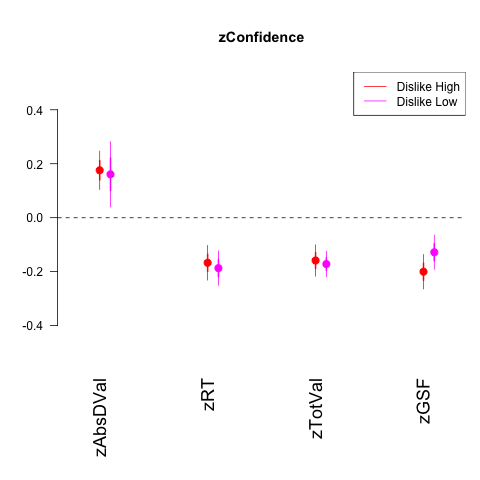

In [115]:
%%R
#title
title_plot = ("zConfidence")

ModelConfidenceD_2 <- glm(zConf ~  zAbsDVal + zRT + zTotVal + zGSF   , data=data_exp1_Dislike_Low) 

ModelConfidenceL_2 <- glm(zConf ~ zAbsDVal + zRT + zTotVal + zGSF  , data=data_exp1_Dislike_High)
BIC1 = BIC(ModelConfidenceL_2)
BIC2 = BIC(ModelConfidenceD_2)
print("Like High BIC:")
print(BIC1)
print("Like Low BIC:")
print(BIC2)

coefplot(ModelConfidenceL_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2,ylim=c(-0.5, .5), mar = c(8,4,5,1) ,main=title_plot)
coefplot(ModelConfidenceD_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="magenta", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike High", "Dislike Low"),col=c("red", "magenta"), lty=1:1, cex=1)

----

## What if total value allow us to characterise in a better way this "Weber law effect"?

[1] "Like BIC:"
[1] 10403.65
[1] "DisLike BIC:"
[1] 10911.05


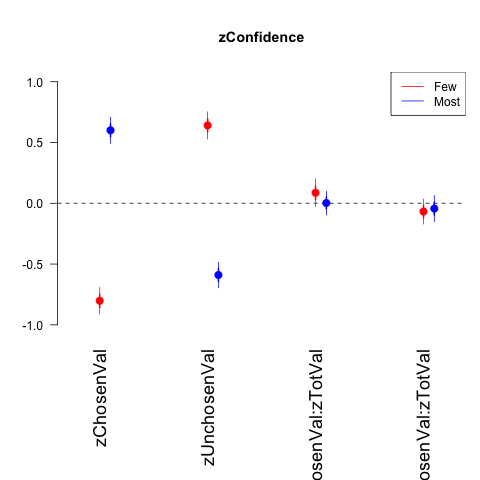

In [62]:
%%R
#title
title_plot = ("zConfidence")

ModelConfidenceL_2 <- glm(zConf ~  zChosenVal + zUnchosenVal + zChosenVal:zTotVal + zUnchosenVal:zTotVal , data=data_exp1_Like)
ModelConfidenceD_2 <- glm(zConf ~  zChosenVal + zUnchosenVal  + zChosenVal:zTotVal + zUnchosenVal:zTotVal, data=data_exp1_DisLike)

BIC1 = BIC(ModelConfidenceL_2)
BIC2 = BIC(ModelConfidenceD_2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceD_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, ylim=c(-1, 1), mar = c(8,4,5,1) ,main=title_plot)
coefplot(ModelConfidenceL_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

## MORE frame

In [64]:
%%R
# Separating the data for both conditions 
data_exp1_Like_Low <- data_exp1[ which(data_exp1$BlockCond=='1' & data_exp1$AbszTotVal_Split=='0'), ]
data_exp1_Like_High <- data_exp1[ which(data_exp1$BlockCond=='1' & data_exp1$AbszTotVal_Split=='1'), ]


[1] "Like High BIC:"
[1] 5185.981
[1] "Like Low BIC:"
[1] 5217.299


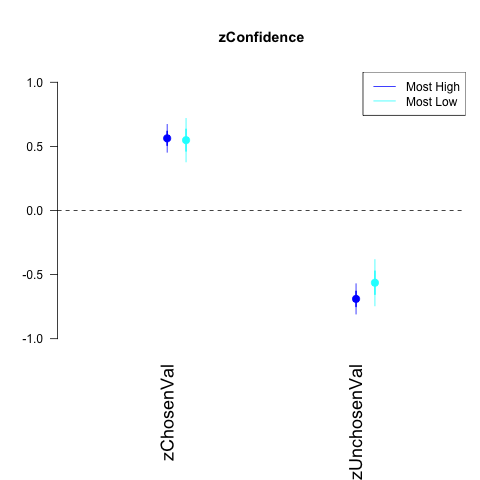

In [73]:
%%R
#title
title_plot = ("zConfidence")

ModelConfidenceD_2 <- glm(zConf ~ zChosenVal + zUnchosenVal + zChosenVal+ zUnchosenVal, data=data_exp1_Like_Low) 

ModelConfidenceL_2 <- glm(zConf ~ zChosenVal + zUnchosenVal  +zChosenVal + zUnchosenVal, data=data_exp1_Like_High)
BIC1 = BIC(ModelConfidenceL_2)
BIC2 = BIC(ModelConfidenceD_2)
print("Like High BIC:")
print(BIC1)
print("Like Low BIC:")
print(BIC2)

coefplot(ModelConfidenceL_2,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2,ylim=c(-1, 1), mar = c(8,4,5,1) ,main=title_plot)
coefplot(ModelConfidenceD_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="cyan", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Most High", "Most Low"),col=c("blue", "cyan"), lty=1:1, cex=1)

## FEWEST frame

In [74]:
%%R
# Separating the data for both conditions 
data_exp1_Dislike_Low <- data_exp1[ which(data_exp1$BlockCond=='2' & data_exp1$AbszTotVal_Split=='0'), ]
data_exp1_Dislike_High <- data_exp1[ which(data_exp1$BlockCond=='2' & data_exp1$AbszTotVal_Split=='1'), ]


[1] "Like High BIC:"
[1] 5413.616
[1] "Like Low BIC:"
[1] 5507.871


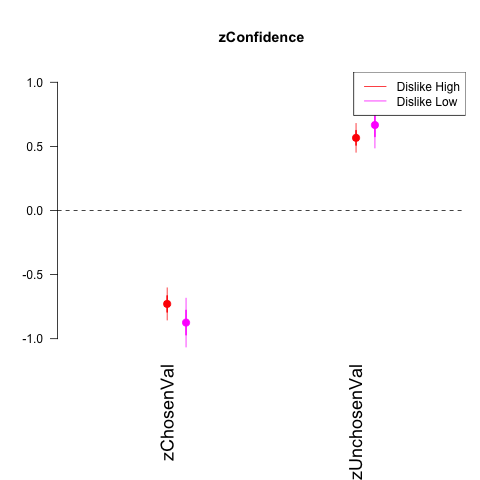

In [75]:
%%R
#title
title_plot = ("zConfidence")

ModelConfidenceD_2 <- glm(zConf ~  zChosenVal + zUnchosenVal , data=data_exp1_Dislike_Low) 

ModelConfidenceL_2 <- glm(zConf ~ zChosenVal + zUnchosenVal  , data=data_exp1_Dislike_High)
BIC1 = BIC(ModelConfidenceL_2)
BIC2 = BIC(ModelConfidenceD_2)
print("Like High BIC:")
print(BIC1)
print("Like Low BIC:")
print(BIC2)

coefplot(ModelConfidenceL_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2,ylim=c(-1, 1), mar = c(8,4,5,1) ,main=title_plot)
coefplot(ModelConfidenceD_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="magenta", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike High", "Dislike Low"),col=c("red", "magenta"), lty=1:1, cex=1)

 # Extras

[1] "Like BIC:"
[1] 10397.41
[1] "DisLike BIC:"
[1] 10895.34


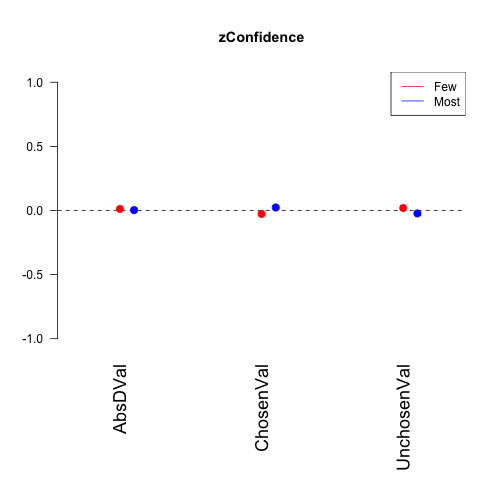

In [85]:
%%R
#title
title_plot = ("zConfidence")

ModelConfidenceL_2 <- glm(zConf ~ AbsDVal + ChosenVal + UnchosenVal  , data=data_exp1_Like)
ModelConfidenceD_2 <- glm(zConf ~ AbsDVal +  ChosenVal + UnchosenVal , data=data_exp1_DisLike)

BIC1 = BIC(ModelConfidenceL_2)
BIC2 = BIC(ModelConfidenceD_2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceD_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelConfidenceL_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 10391.54
[1] "DisLike BIC:"
[1] 10896.93


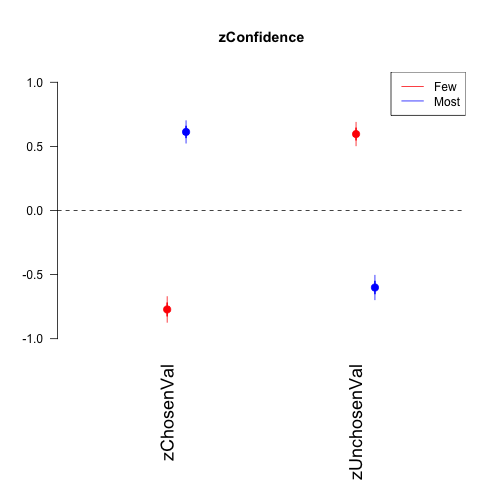

In [83]:
%%R
#title
title_plot = ("zConfidence")

ModelConfidenceL_2 <- glm(zConf ~  zChosenVal + zUnchosenVal , data=data_exp1_Like)
ModelConfidenceD_2 <- glm(zConf ~  zChosenVal + zUnchosenVal , data=data_exp1_DisLike)

BIC1 = BIC(ModelConfidenceL_2)
BIC2 = BIC(ModelConfidenceD_2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceD_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelConfidenceL_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

# Appendix
_____________________________________________________________________________________________________________________

<a id='ImpPkg'></a>
# 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


In [3]:
%%R
# Use in case the libraries are not available in the system
#install.packages('lme4')
#install.packages("car")
#install.packages("ggplot2")
#install.packages("broom")
#install.packages("arm") # arm is required for coefplot
#install.packages("ggplot2")
#install.packages("optimx")
#install.packages("multcomp")


NULL


<a id='LoadFunc'></a>
# 2. Defining Functions

#### Taken from Folke et al. (2016)

### Plot distributions

In [4]:
def participant_densities(data, var, xlim=(0,100), rug=True):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(15,70))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 3, order)
            sns.kdeplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x], shade=True)
            #if rug==True:
            #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1

### Split variable into participantwise quantiles

In [5]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1))
    return qvalues

### Full simple logistic graph

In [6]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(6,5))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=28)
    sub.set_xlabel(xlab, fontsize=28)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    leg = sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()

### Full simple logistic graph (no bins)

In [7]:
def logisticplot_simpl (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()
    print ('Low measure coef',clf.coef_)
    
    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    print ('High measure coef',clf.coef_)



    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5) 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    leg = sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    
    sns.despine()

### Regression Coefficients Plot

In [8]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [9]:
def Coefpresplot2(regtable,regtable2, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    

    # Set axis limits based on whether to include the intercept or not    
    
       
    
    if intercept == True:
        
        XLim = (0.75, len(regtable.columns) + 0.25)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', :].min()) < round_to_5(regtable2.loc['CImin', :].min()):
            Ymin = round_to_5(regtable.loc['CImin', :].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',:].min()-0.5)
        if round_to_5(regtable.loc['CImax', :].max()) > round_to_5(regtable2.loc['CImax', :].max()):
            Ymax = round_to_5(regtable.loc['CImax', :].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', :].max()+0.5)      

        YLim = (Ymin, Ymax)    
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()) < round_to_5(regtable2.loc['CImin', regtable.columns[1]:].min()):
            Ymin = round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',regtable.columns[1]:].min()-0.5)
        if round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()) > round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()):
            Ymax = round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()+0.5)      
        
        YLim = (Ymin, Ymax)
    
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # both regtable should have the same regressors (and in the same order)

    if intercept == True:
        Coefficients = regtable.columns
 #       Coefficients2 = regtable2.columns
    else:
        Coefficients = regtable.columns[1:]
#        Coefficients2 = regtable2.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position-0.1, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color='blue',label = 'Like')
        ax.plot(position+0.1, regtable2.loc['coefficient', Coefficient], marker='X', ms=8, color='red', label = 'Dislike')


        ax.errorbar(position-0.1, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='blue')
        ax.errorbar(position+0.1, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='red')
        
        if position == 1:
            ax.legend( prop={'size': 20})

 
    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()

    sns.despine()
    fig.savefig(str('SavedFigures/'+title +'.png'), dpi = 200 )

In [10]:
def Coefpresplot_bar(regtable, mixtable, intercept=False, barcol='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0, len(regtable.columns) + 1)
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    else:
        XLim = (0, len(regtable.columns) )
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = [barcol] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.bar(position, regtable.loc['coefficient', Coefficient], width=0.8,color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='#000000')
        
   # Plot dots for the individual coefficients
    coef_num = len(mixtable)
    for i in range(1,coef_num):
        part_coefs = mixtable[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.5,high=0.5,size=len(part_coefs))/2
        ax.plot(position_parts+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [11]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=False, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    if intercept == True:
        XLim = (0, len(regtable1.columns) + 2)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    else:
        XLim = (0, len(regtable1.columns) +1)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    if intercept == True:
        Coefficients = regtable1.columns
    else:
        if len(regtable1.columns)<len(mixtable1):
            Coefficients = regtable1.columns
        else:
            Coefficients = regtable1.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        # Plot condition 1
        ax.bar(position-0.2, regtable1.loc['coefficient', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-0.2, regtable1.loc['coefficient', Coefficient],
                    yerr=regtable1.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+0.2, regtable2.loc['coefficient', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+0.2, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        
   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    if intercept == True:
        coef_num = range(0,len(mixtable1)) 
    else:
        coef_num = range(1,len(mixtable1))
        
    for i in coef_num:
        # Plot dots condition 1
        part_coefs = mixtable1[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts-0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        # Plot dots condition 1
        part_coefs = mixtable2[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts+0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable1.columns, rotation=0)        
    else:
        if len(regtable1.columns)<len(mixtable1):
            ax.set_xticklabels(regtable1.columns, rotation=0)
        else:    
            ax.set_xticklabels(regtable1.columns[1:], rotation=0)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [12]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [13]:
def correl_plot2 (data_all,data_all2,x_variable,y_variable,color1 = '#000000',color2 = '#000000',x_varlabel = "x_variable" ,y_varlabel = "y_variable", data_label =('Correct', 'Error'), ylims=(0,0),xlims=(0,0), title = "Pretty PLot"):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color1, scatter_kws={'s':20,'alpha':0.1},)
    ax = sns.regplot(data=data_all2, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color2, scatter_kws={'s':20,'alpha':0.1})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

    # For data 1
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p1 = ax.plot(future, future_fit, color=color1, lw=3, label = data_label[0])
    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Data 1: Pearson's r = {0}".format(np.round(results[0], 3)), ", p = ", np.round(results[1], 3), ", slope = ", np.round(results[1], 3) )
    
    # For data 2
    x=data_all2[x_variable]
    y=data_all2[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p2 = ax.plot(future, future_fit, color=color2, lw=3,label = data_label[1] )
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all2[x_variable], data_all2[y_variable])
    print ("Data 2: Pearson's r = {0}".format(np.round(results[0], 3)), ", p = ", np.round(results[1], 3))
    
    ax.legend()
    ax.set_title(title)
    
    if ylims[0] !=0 and ylims[0] != 0: 
                ax.set_ylim(ylims[0],ylims[1])
            
    if xlims[0] !=0 and xlims[0] != 0: 
                ax.set_xlim(xlims[0],xlims[1])

    
    plt.show()

In [14]:
def logisticplot_all_sbj_slope(moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
#inputs example   
#logisticplot_all('DDTSplit', 'High DDT', 'Low DDT', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (DVal)',
#                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Part')


    # Counter to know where to plot the particpant
    order = 1
    # Initialize the array to store coefs
    coefs_all = []

   # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(50,70))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/5+1), 5, order)
            
            
            # Extract dataframe for that particualt participant
            data_in = data.loc[data['Part'] == x]
           
            sns.set(font_scale=1.5, style='white')
           
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            #sub = plt.subplot()
            sub['%s' % x].set_title('Part. %s' % x, fontsize = 50 )


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            # Paula used these dictionaries to store the values of the predictive lines for all the participants.
            logit_low = {}
            logit_high = {}
            logit_all = {}

            
            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

            # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data[moderator]==0)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data[moderator]==0)].index, yaxis])
            logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x , ' Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            low_coef = clf.coef_
            low_intercept = clf.intercept_
            
            # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data_in[moderator]==1)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data_in[moderator]==1)].index, yaxis])
            logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            high_coef = clf.coef_
            high_intercept = clf.intercept_
            
            
            # fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            all_coef = clf.coef_
            all_intercept = clf.intercept_
    
            #Plotting the predictive lines
            line_high = sub['%s' % x].plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
            line_low = sub['%s' % x].plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)
            line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')
            
            coefs_part= np.column_stack((x,low_coef,low_intercept,high_coef,high_intercept,all_coef,all_intercept))
            coefs_all.append(coefs_part[0])

            
            #Plotting the binned data
            data_in['DVBin2'] = data_in.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values[0]

            # determine the x coordinates
            x_cords= data.groupby('DVBin2')[xaxis].mean()

            # determine low y coordinates
            y_cords_low = data_in.loc[(data_in[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

            # determine low y standard errors
            test = pd.DataFrame(data_in.loc[(data_in[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
            # determine high y coordinates
            y_cords_high = data_in.loc[(data_in[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

            # determine high y standard errors
            test2 = pd.DataFrame(data_in.loc[data_in[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

            # plot the low points
            plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
            # plot low error bars
            plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

            # plot the high points
            plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
            # plot high error bars
            plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
           # sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=30)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
        

            sns.despine()
            
            order += 1
    
    custom_lines = [Line2D([0], [0], color=modhighcol, lw=4),
                Line2D([0], [0], color=modlowcol, lw=4)]
    fig.legend(custom_lines, [modhigh, modlow],loc = 4 , fontsize=50)       

    fig.text(0.5, -0.01, xlab, ha='center',fontsize = 70 )
    fig.text(-0.01, 0.5, ylab, va='center',fontsize = 70, rotation='vertical')
    
    coefs_all = pd.DataFrame(coefs_all,columns=['Participant','Low Coef','Low Intercept','High Coef','High Intercept','All Coef','All Intercept'])
    return coefs_all

In [15]:
def linealplot_like_dislike (data1,data2,modlow,modhigh, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA',modhighcol='#000000', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()



    #Plotting the binned data
    data1['DVBin2'] = data1.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    data2['DVBin2'] = data2.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    
    # determine the x coordinates
    x_cords1= data1.groupby('DVBin2')[xaxis].mean()
    x_cords2= data2.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data1.groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data2.groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords1, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1,label=modlow)
    # plot low error bars
    plt.errorbar(x_cords1, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords2, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2,label=modhigh)
    # plot high error bars
    plt.errorbar(x_cords2, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
  #  sub.set_xticks((-5,-3,-1,1,3,5))
  #  sub.set_yticks((0,0.25,0.5,0.75,1))
  #  sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
  #  sub.set_ylim(-0.01, 1.01)
  #  sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=8, prop={'size':20})
    sns.despine()

In [16]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [17]:
def splitByVar(new_data, Splits_variables,Splits_headers):

    median_matrix=[]
    median_matrix_aux=[]
    median_matrix_aux_cond=[]
    Split_cols = []
    
    for h in range(len(Splits_variables)):
        median_matrix=[]
        for i in unique(new_data["Part"]):
            median_matrix_aux=[]
    
            for j in unique(new_data["BlockCond"]):
                #median_matrix_aux_cond=[]
    
                #Extract data by participant and BlockCond (1: Like, 2: Dislike)
                Splitdata = new_data.loc[new_data['Part'] == i]
                Splitdata = Splitdata.loc[Splitdata['BlockCond'] == j]
                
                # Select the column to split
                Splitdata = Splitdata.loc[:,['TrialN',Splits_variables[h]]]
                SplitSort = Splitdata.values
                # Sort for confidence column
                SplitSort = SplitSort[np.argsort(SplitSort[:, 1])]
                #print(SplitSort)
                lenPart = len(Splitdata)
                #print(lenPart)
                # Generate column with median order
                median_low = [0] * int (lenPart/2)
                #print (median_low)
                median_high = [1] * int (lenPart/2)
                #print (median_high)
                median_split_order = median_low + median_high
                #Attach split median order column (1 and 0)
                median_aux= np.column_stack((SplitSort,median_split_order))
                #Sort back to trial number
                SplitSorted = median_aux[np.argsort(median_aux[:, 0])]
                #print(len(SplitSorted))
                
                for kk in range(len(SplitSorted)): 
                    if len(median_matrix_aux) == 0 :
                        median_matrix_aux = SplitSorted[0]
                    else:
                        median_matrix_aux = np.vstack([median_matrix_aux, SplitSorted[kk]])
            
            #print(len(median_matrix_aux))
            # sort after adding both conditions    
            median_matrix_aux = median_matrix_aux[np.argsort(median_matrix_aux[:, 0])]
            
            #Extract only the column with the median split information
            median_matrix_aux = median_matrix_aux[:,2]
            
            #append to median matrix for the participants
            for k in range(len(median_matrix_aux)):    
                median_matrix.append(median_matrix_aux [k])
        
        #median_matrix = pd.DataFrame(median_matrix,columns=[Splits_headers[h]])
        #print(len (median_matrix))
        #add new column (new split variable columns) to the split matrix
        if  h == 0:
            Split_cols = median_matrix
        else:
            Split_cols = pd.concat([Split_cols,median_matrix ],axis =1)
    return Split_cols

        